# **Importing Dependencies**

In [1]:
#Importing Dependancies
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

2024-05-14 06:36:40.125806: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 06:36:40.125919: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 06:36:40.253380: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Defining a function to do necessary preprocessing
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        try:
            img = Image.open(os.path.join(directory, filename))
            img = img.resize((128, 128))
            img = img.convert('RGB')
            img = np.array(img) / 255.0
            images.append(img)
        except OSError as e:
            print(f"Error loading {os.path.join(directory, filename)}: {e}")
            continue
    return images

# **Importing Data**

In [3]:
#Loading Data
fr_test = load_images('/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/fractured')
fr_train = load_images('/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured')
fr_val = load_images('/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/fractured')
no_fr_test = load_images('/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured')
no_fr_train = load_images('/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured')
no_fr_val = load_images('/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured')

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Error loading /kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004347.jpg: image file is truncated (40 bytes not processed)
Error loading /kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004148.jpg: image file is truncated (14 bytes not processed)
Error loading /kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004134.jpg: image file is truncated (1 bytes not processed)
Error loading /kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004149.jpg: image file is truncated (33 bytes not processed)
Error loading /kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/

# **Visualization**

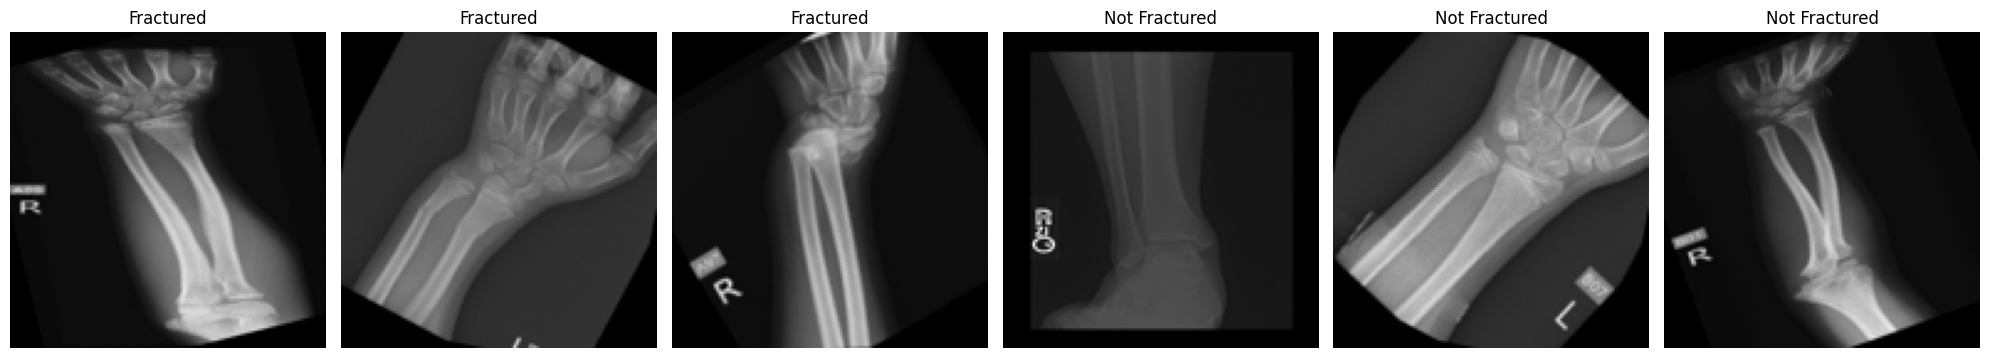

In [4]:
# Visuals of pictures we are working on.
fig, axes = plt.subplots(1, 6, figsize=(20, 10))
axes[0].imshow(fr_test[0])
axes[1].imshow(fr_train[0])
axes[2].imshow(fr_val[0])
axes[3].imshow(no_fr_test[0])
axes[4].imshow(no_fr_train[0])
axes[5].imshow(no_fr_val[0])
axes[0].set_title('Fractured')
axes[1].set_title('Fractured')
axes[2].set_title('Fractured')
axes[3].set_title('Not Fractured')
axes[4].set_title('Not Fractured')
axes[5].set_title('Not Fractured')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

In [5]:
#Combining Data for Convinience 
train_images = np.concatenate((fr_train, no_fr_train))
val_images = np.concatenate((fr_val, no_fr_val))
test_images = np.concatenate((fr_test, no_fr_test))

**Assigning Class Labels**

In [6]:
#Assigning Labels 
train_labels = np.concatenate((np.ones(len(fr_train)), np.zeros(len(no_fr_train))))
val_labels = np.concatenate((np.ones(len(fr_val)), np.zeros(len(no_fr_val))))
test_labels = np.concatenate((np.ones(len(fr_test)), np.zeros(len(no_fr_test))))

In [7]:
train_labels

array([1., 1., 1., ..., 0., 0., 0.])

# **Tensorflow Input Data Pipeline**

In [8]:
#Tensorflow Input Data Pipeline
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [9]:
#Batching
batch_size = 32
train = train_ds.shuffle(buffer_size=len(train_images)).batch(batch_size)

In [10]:
val = val_ds.batch(batch_size)
test= test_ds.batch(batch_size)

In [11]:
train.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

# **Model Architecture**

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(128, 128, 3), padding='valid'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(train, validation_data = val, epochs = 10, verbose = 1)

Epoch 1/10
 10/289 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5779 - loss: 0.7014

I0000 00:00:1715668730.959395      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715668730.978339      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7325 - loss: 0.5168

W0000 00:00:1715668741.775120      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


289/289 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.7328 - loss: 0.5163 - val_accuracy: 0.8991 - val_loss: 0.3153
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9539 - loss: 0.1338 - val_accuracy: 0.9417 - val_loss: 0.1545
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9845 - loss: 0.0495 - val_accuracy: 0.9563 - val_loss: 0.0911
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9866 - loss: 0.0385 - val_accuracy: 0.9781 - val_loss: 0.0641
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9911 - loss: 0.0265 - val_accuracy: 0.9806 - val_loss: 0.0558
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9953 - loss: 0.0171 - val_accuracy: 0.9793 - val_loss: 0.0733
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9931 - loss: 0.0226 - val_accuracy: 0.9781 - val_loss: 0.0641
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9948 - loss: 0.0158 - val_accuracy: 0.9

# **Model Evaluation**

In [17]:
model.evaluate(test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 1.0000 - loss: 0.0045


[0.004532754421234131, 1.0]

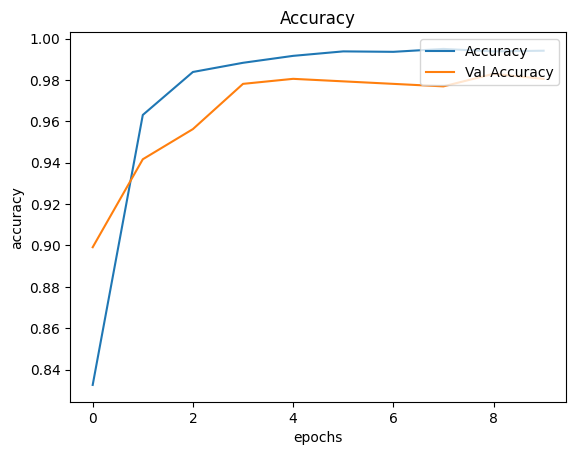

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc = 'upper right')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

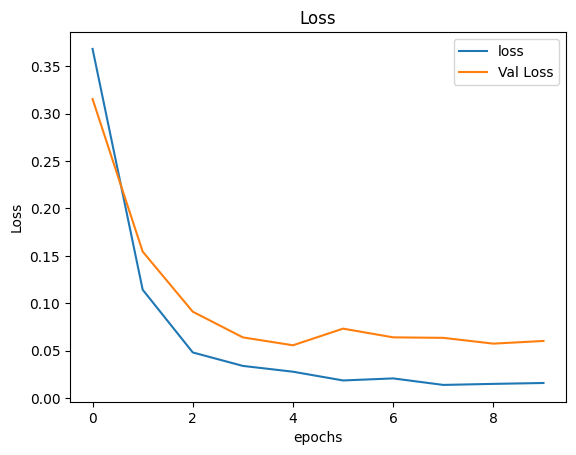

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'Val Loss'], loc = 'upper right')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

# **Confusion and Classification Metrics**

In [20]:
pred = model.predict(test)
pred = (pred > 0.5).astype('int')
    
pred

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [21]:
# We have data in batches so, make truth data to match the shape of Predicted. You can do it in many ways.
truth = np.concatenate([y for _, y in test], axis=0)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix



print('Classification Report: \n', classification_report(truth, pred))

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       262
         1.0       1.00      1.00      1.00       238

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [23]:
cm = confusion_matrix(truth, pred)

<Axes: >

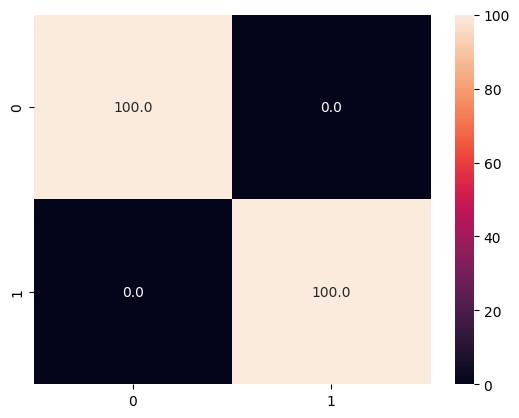

In [24]:
import seaborn as sns

total_per_class = cm.sum(axis=1)
percentage_matrix = (cm / total_per_class[:, None]) * 100

sns.heatmap(percentage_matrix, annot=True, fmt=".1f")

#                                                                      **Thank You**